In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import warnings
import time
import nfl_data_py as nfl
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, brier_score_loss, auc, classification_report, roc_curve, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
os.chdir("/Users/gmduncan/Desktop/NFL")

In [39]:
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("val.csv")

In [40]:
display(train_df)
display(val_df)

train_df['tackle_efficiency_ingame'].fillna(0, inplace=True)
train_df['tackle_rating_ingame'].fillna(0, inplace=True)

val_df['tackle_efficiency_ingame'].fillna(0, inplace=True)
val_df['tackle_rating_ingame'].fillna(0, inplace=True)

train_df.isna().sum()

,gameId,playId,nflId,frameId,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single,down,yardsToGo,defendersInTheBox,offenseFormation,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,surface,inside_outside,weight,position,gamePlayId
0,2.022091e+09,56.0,38577.0,6.0,41.89,24.593333,272.29,280.53,288.200000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,3.195387,10.116071,10.461855,10.882909,12.035414,12.635874,12.701657,13.169210,14.799963,23.582173,7.067538,75.239538,89.059902,122.727777,103.094000,104.570954,166.159966,86.642246,80.903275,77.812451,158.729540,16.542527,2.62,3.35,3.948566,69.85,17.743333,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0
1,2.022091e+09,56.0,41239.0,6.0,27.85,23.373333,112.35,83.84,364.000000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,1.400321,1.783620,2.496898,3.993257,4.414386,4.674409,8.228657,17.168183,21.436532,32.008038,13.527265,113.577579,163.037991,150.980380,102.982031,53.447313,68.130076,59.944064,110.580937,72.972206,65.058378,136.944687,2.86,3.62,12.659069,69.85,17.743333,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,280,DT,2022090800.056.0
2,2.022091e+09,56.0,42816.0,6.0,49.38,45.673333,351.67,298.43,346.254545,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,1.233207,10.014569,22.204274,22.838312,26.325539,26.712411,27.894992,30.064028,31.255438,33.017583,29.415605,89.937075,111.358111,93.020417,127.965101,125.346367,127.777247,120.762863,123.703959,122.414454,123.035494,99.957121,4.14,2.60,23.831392,69.85,17.743333,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,184,CB,2022090800.056.0
3,2.022091e+09,56.0,43294.0,6.0,41.85,15.483333,91.50,129.04,116.290909,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,8.993442,13.196030,14.422794,14.850576,15.279797,15.418982,16.539265,16.979061,21.643128,32.342421,2.828003,22.070958,48.171854,61.668459,56.543692,67.764015,42.186107,43.622479,30.430267,8.319643,15.291336,35.450938,1.23,5.88,0.000000,69.85,17.743333,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,0,1.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,208,CB,2022090800.056.0
4,2.022091e+09,56.0,43298.0,6.0,27.89,20.193333,66.47,110.88,241.090909,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,0.773886,2.104305,3.431049,5.466160,7.240836,7.311580,10.903687,17.517377,23.554390,34.387191,12.502404,48.770529,7.667234,0.177919,21.988835,3.672038,5.689796,3.646058,54.242746,21.039989,15.533146,77.770945,2.21,1.34,5.949168,69.85,17.743333,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,240,DE,2022090800.056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581849,2.022111e+09,3787.0,52627.0,40.0,33.31,24.130000,232.70,208.08,228.136364,0,0.992596,26.24,19.720000,1.60,4.04,103.01,121.39,223,RB,409.509091,run,5.762126,6.157175,8.404154,9.069785,10.327323,13.093854,13.440610,13.880295,14.914801,16.563155,8.332647,120.898591

,gameId,playId,nflId,frameId,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single,down,yardsToGo,defendersInTheBox,offenseFormation,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,surface,inside_outside,weight,position,gamePlayId
0,2.022091e+09,299.0,37075.0,19.0,25.50,28.980000,144.94,214.39,167.045455,0,0.730319,21.58,25.770000,4.98,2.57,73.45,47.65,200,RB,233.636364,run,0.490918,2.469818,2.681679,3.123492,3.197890,5.313266,5.321325,5.432826,5.593255,6.915671,5.066606,128.563532,156.819480,143.089561,29.732712,105.321811,86.939113,68.636756,135.666698,139.767065,127.380412,74.373277,1.47,2.84,3.687020,88.42,25.770000,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,250,OLB,2022090800.0299.0
1,2.022091e+09,299.0,40107.0,19.0,43.77,24.360000,56.13,183.87,129.840909,0,0.730319,21.58,25.770000,4.98,2.57,73.45,47.65,200,RB,233.636364,run,16.868509,17.156086,17.285002,17.562417,18.135165,18.701725,19.416864,19.626110,21.554491,21.936556,22.234752,126.554305,115.423454,126.257324,117.101080,131.124334,111.111904,119.113710,93.947688,122.700318,110.936072,120.234192,1.45,3.18,14.812413,88.42,25.770000,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,197,FS,2022090800.0299.0
2,2.022091e+09,299.0,40166.0,19.0,30.13,38.350000,109.03,201.88,217.045455,0,0.730319,21.58,25.770000,4.98,2.57,73.45,47.65,200,RB,233.636364,run,5.384877,10.880239,11.931220,11.943609,12.511051,13.633360,15.124566,15.151271,15.689825,16.851139,15.210487,122.227106,135.959469,120.524966,144.780794,143.288137,136.209536,148.716493,147.108019,130.695163,146.010110,126.768004,2.50,4.97,12.509970,88.42,25.770000,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,191,SS,2022090800.0299.0
3,2.022091e+09,299.0,41341.0,19.0,27.37,23.080000,57.92,145.13,158.072727,0,0.730319,21.58,25.770000,4.98,2.57,73.45,47.65,200,RB,233.636364,run,0.665282,1.034650,1.883667,3.507720,3.842512,4.129722,5.429632,5.714342,7.944589,11.086794,6.384372,74.643352,89.311501,154.504535,49.326839,40.610766,77.668635,103.611681,50.863729,70.897492,35.234030,97.160696,1.08,2.75,5.846474,88.42,25.770000,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,322,DT,2022090800.0299.0
4,2.022091e+09,299.0,44976.0,19.0,29.84,21.830000,221.34,165.78,78.050000,0,0.730319,21.58,25.770000,4.98,2.57,73.45,47.65,200,RB,233.636364,run,3.399118,3.798908,4.067087,5.786199,5.894413,6.820264,7.932950,8.178343,10.528822,12.699165,9.151568,72.130309,69.793980,44.723006,93.994794,100.292892,78.713953,98.431190,62.634035,86.301521,117.303757,66.841029,0.77,1.92,7.779514,88.42,25.770000,0,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,223,OLB,2022090800.0299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556969,2.022111e+09,3602.0,48537.0,42.0,45.43,29.473333,312.24,250.46,130.500000,1,0.004137,44.45,26.503333,1.06,2.33,158.81,151.36,211,RB,223.468182,run,0.764853,2.093442,2.146742,4.902295,4.903805,5.247418,5.271632,7.668246,8.161035,13.

gameId            0
playId            0
nflId             0
frameId           0
x                 0
                 ..
surface           0
inside_outside    0
weight            0
position          0
gamePlayId        0
Length: 83, dtype: int64

In [41]:
used_dv = ['tackle_binary_single']
all_dv = ['tackle_binary_all','tackle_nonbinary_all','tackle_nonbinary_single', 'tackle_binary_single']
# unused_dv = [value for value in all_dv if value not in used_dv]
cols_to_drop = ['gameId', 'playId', 'frameId'] + all_dv # Keeping gamePlayId in for now, as splitting data later using it. Will drop then logical sense

x_train = train_df.drop(columns = cols_to_drop)
x_val = val_df.drop(columns = cols_to_drop)

y_train = train_df[used_dv]
y_val = val_df[used_dv]

In [42]:
display(x_train)
display(y_train)
y_val.value_counts()

,nflId,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,down,yardsToGo,defendersInTheBox,offenseFormation,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,surface,inside_outside,weight,position,gamePlayId
0,38577.0,41.89,24.593333,272.29,280.53,288.200000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,3.195387,10.116071,10.461855,10.882909,12.035414,12.635874,12.701657,13.169210,14.799963,23.582173,7.067538,75.239538,89.059902,122.727777,103.094000,104.570954,166.159966,86.642246,80.903275,77.812451,158.729540,16.542527,2.62,3.35,3.948566,69.85,17.743333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0
1,41239.0,27.85,23.373333,112.35,83.84,364.000000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,1.400321,1.783620,2.496898,3.993257,4.414386,4.674409,8.228657,17.168183,21.436532,32.008038,13.527265,113.577579,163.037991,150.980380,102.982031,53.447313,68.130076,59.944064,110.580937,72.972206,65.058378,136.944687,2.86,3.62,12.659069,69.85,17.743333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,280,DT,2022090800.056.0
2,42816.0,49.38,45.673333,351.67,298.43,346.254545,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,1.233207,10.014569,22.204274,22.838312,26.325539,26.712411,27.894992,30.064028,31.255438,33.017583,29.415605,89.937075,111.358111,93.020417,127.965101,125.346367,127.777247,120.762863,123.703959,122.414454,123.035494,99.957121,4.14,2.60,23.831392,69.85,17.743333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,184,CB,2022090800.056.0
3,43294.0,41.85,15.483333,91.50,129.04,116.290909,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,8.993442,13.196030,14.422794,14.850576,15.279797,15.418982,16.539265,16.979061,21.643128,32.342421,2.828003,22.070958,48.171854,61.668459,56.543692,67.764015,42.186107,43.622479,30.430267,8.319643,15.291336,35.450938,1.23,5.88,0.000000,69.85,17.743333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,208,CB,2022090800.056.0
4,43298.0,27.89,20.193333,66.47,110.88,241.090909,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,0.773886,2.104305,3.431049,5.466160,7.240836,7.311580,10.903687,17.517377,23.554390,34.387191,12.502404,48.770529,7.667234,0.177919,21.988835,3.672038,5.689796,3.646058,54.242746,21.039989,15.533146,77.770945,2.21,1.34,5.949168,69.85,17.743333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,240,DE,2022090800.056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581849,52627.0,33.31,24.130000,232.70,208.08,228.136364,0,0.992596,26.24,19.720000,1.60,4.04,103.01,121.39,223,RB,409.509091,run,5.762126,6.157175,8.404154,9.069785,10.327323,13.093854,13.440610,13.880295,14.914801,16.563155,8.332647,120.898591,18.958315,39.143277,34.784455,36.160176,56.158964,17.330810,130.175670,21.064381,50.416303,20.745637,2.39,4.86,6.488457,83.76,19.720000,0,1,0,0,1.0,0.50,18.0,0.0,1.0,1.0,2,4,5,1,1,3,1,5,1,10,4.0,SHOTGUN,21,3577,13,27,turf,inside,210,SS,2022110700.03787.0
2581850,53460.0,22.08,24.320000,9.17,29.86,112.254545,0,0.992596,26.

,tackle_binary_single
0,0
1,0
2,0
3,0
4,0
...,...
2581849,0
2581850,0
2581851,0
2581852,0


tackle_binary_single
0                       554622
1                         2352
Name: count, dtype: int64

In [43]:
object_cols = x_train.select_dtypes(include='object').dtypes.index
object_cols

x_train[object_cols] = x_train[object_cols].astype('category')
x_val[object_cols] = x_val[object_cols].astype('category')

print(x_train.select_dtypes(include='object').dtypes)

x_train
x_train.dtypes.unique()

Series([], dtype: object)


array([dtype('float64'), dtype('int64'),
       CategoricalDtype(categories=['FB', 'QB', 'RB', 'TE', 'WR'], ordered=False),
       CategoricalDtype(categories=['other', 'pass', 'qb_run', 'run'], ordered=False),
       CategoricalDtype(categories=['EMPTY', 'I_FORM', 'JUMBO', 'PISTOL', 'SHOTGUN',
                         'SINGLEBACK', 'WILDCAT'],
       , ordered=False)                                                             ,
       CategoricalDtype(categories=['grass', 'turf'], ordered=False),
       CategoricalDtype(categories=['inside', 'outside'], ordered=False),
       CategoricalDtype(categories=['CB', 'DB', 'DE', 'DT', 'FB', 'FS', 'ILB', 'MLB', 'NT',
                         'OLB', 'RB', 'SS', 'WR'],
       , ordered=False)                                                                    ,
       CategoricalDtype(categories=['2022090800.0101.0', '2022090800.01030.0',
                         '2022090800.01187.0', '2022090800.0122.0',
                         '2022090800.012

### Different measurements

1. Precision: Precision is the number of true positives divided by the sum of true positives and false positives. It measures the accuracy of the positive predictions.
Precision = True Positives / (True Positives + False Positives)

2. Recall (Sensitivity or True Positive Rate): Recall is the number of true positives divided by the sum of true positives and false negatives. It measures the ability of the model to capture all the positive instances.
Recall = True Positives / (True Positives + False Negatives)

3. F1-Score: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
F1-Score = 2 × (Precision×Recall) / (Precision + Recall)

4. Area Under the Precision-Recall Curve (AUC-PR): AUC-PR summarizes the trade-off between precision and recall for different probability thresholds.
You can use these metrics to assess the model's performance, especially its ability to correctly identify instances of the minority class.

### Run the model

In [44]:
group_sizes_train = x_train.groupby('gamePlayId').size().tolist()
group_sizes_val = x_val.groupby('gamePlayId').size().tolist()

x_train = x_train.drop(columns = 'gamePlayId')
x_val = x_val.drop(columns = 'gamePlayId')

# Convert data into DMatrix format (XGBoost's internal data structure)
dtrain = xgb.DMatrix(x_train, label=y_train, enable_categorical=True, group=group_sizes_train)
dval = xgb.DMatrix(x_val, label=y_val, enable_categorical=True, group=group_sizes_val)
# dtest = xgb.DMatrix(x_test, label=y_test, enable_categorical=True)

# Set hyperparameters for XGBoost model
# params = {
#     'objective': 'binary:logistic',  # for binary classification
#     'eval_metric': 'logloss',  # use logloss for binary classification problems
#     'max_depth': 10,  # maximum depth of the tree
#     'eta': 0.1,  # learning rate
#     'subsample': 0.8,  # fraction of samples used for fitting the trees
#     'colsample_bytree': 0.8,  # fraction of features used for fitting the trees
#     'scale_pos_weight': .75 # gives more weight to positive classes TODO: LOOK INTO THIS MORE
  #  'silent': 1  # set to 1 to mute the printed messages
# }

params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',  # use logloss for binary classification problems todo: test between logloss, error, auc
    'max_depth': 4,  # maximum depth of the tree
    'eta': 0.05,  # learning rate
    'subsample': 0.9,  # fraction of samples used for fitting the trees
    'colsample_bytree': 0.9,  # fraction of features used for fitting the trees
    'n_estimators': 140,
    'gamma': 0.2,
    'min_child_weight': 5,
    'scale_pos_weight': 5
}

# Train the XGBoost model with early stopping
num_rounds = 250  # number of boosting rounds
early_stopping_rounds = 10  # You can adjust this value

# Specify the validation set for early stopping
evals = [(dtrain, 'train'), (dval, 'validation')]

# Add early stopping rounds
model = xgb.train(params, dtrain, num_rounds, evals=evals, early_stopping_rounds=early_stopping_rounds)
# model = xgb.train(params, dtrain, num_rounds)



[0]	train-logloss:0.13874	validation-logloss:0.13890
[1]	train-logloss:0.13279	validation-logloss:0.13300
[2]	train-logloss:0.12718	validation-logloss:0.12743
[3]	train-logloss:0.12195	validation-logloss:0.12221
[4]	train-logloss:0.11694	validation-logloss:0.11724
[5]	train-logloss:0.11221	validation-logloss:0.11253
[6]	train-logloss:0.10775	validation-logloss:0.10809
[7]	train-logloss:0.10354	validation-logloss:0.10390
[8]	train-logloss:0.09954	validation-logloss:0.09992
[9]	train-logloss:0.09576	validation-logloss:0.09616
[10]	train-logloss:0.09217	validation-logloss:0.09258
[11]	train-logloss:0.08889	validation-logloss:0.08931
[12]	train-logloss:0.08567	validation-logloss:0.08610
[13]	train-logloss:0.08263	validation-logloss:0.08308
[14]	train-logloss:0.07975	validation-logloss:0.08020
[15]	train-logloss:0.07701	validation-logloss:0.07749
[16]	train-logloss:0.07441	validation-logloss:0.07491
[17]	train-logloss:0.07195	validation-logloss:0.07246
[18]	train-logloss:0.06963	validation-

### Evaluate model performance

In [45]:
# Evaluate the model
predictions = model.predict(dval)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]

# Only consider instances where true label is 1 (completed tackle)
y_val_tackle = y_val.loc[y_val['tackle_binary_single'] == 1]
binary_predictions_tackle = [pred for i, pred in enumerate(binary_predictions) if y_val['tackle_binary_single'].iloc[i] == 1]

# Evaluate metrics
accuracy = accuracy_score(y_val, binary_predictions)
precision = precision_score(y_val, binary_predictions)
recall = recall_score(y_val, binary_predictions)
f1 = f1_score(y_val, binary_predictions)
roc_auc = roc_auc_score(y_val, binary_predictions)

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}\n')

print(classification_report(y_val, binary_predictions))

Accuracy: 0.9951, Precision: 0.2678, Recall: 0.0991, F1-Score: 0.1446, ROC AUC: 0.5490
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    554622
           1       0.27      0.10      0.14      2352

    accuracy                           1.00    556974
   macro avg       0.63      0.55      0.57    556974
weighted avg       0.99      1.00      0.99    556974


### Visualize model performance

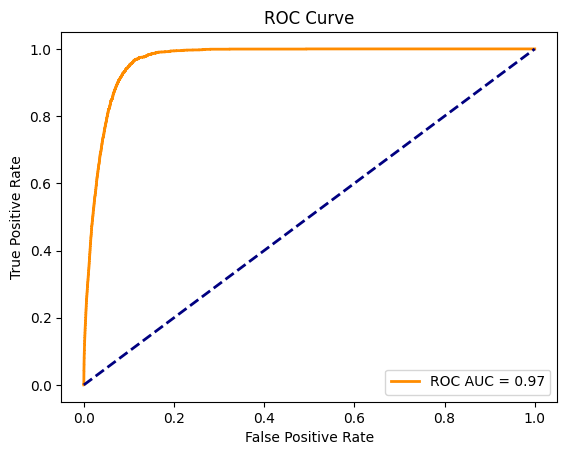

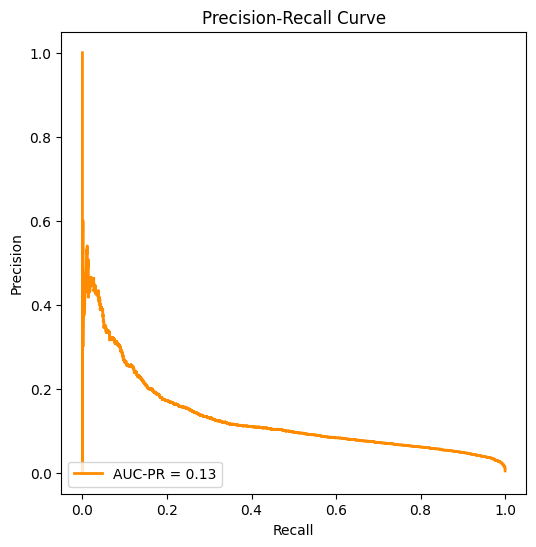

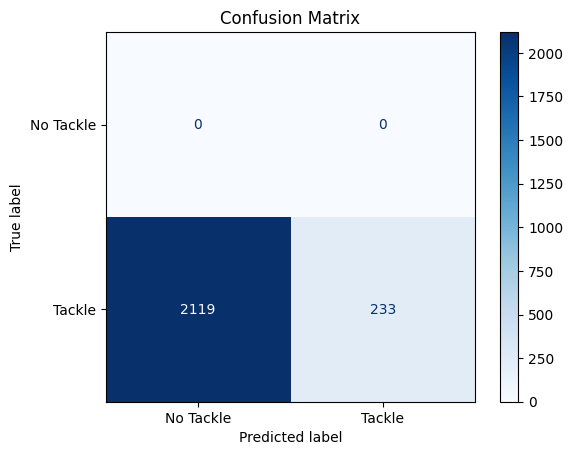

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

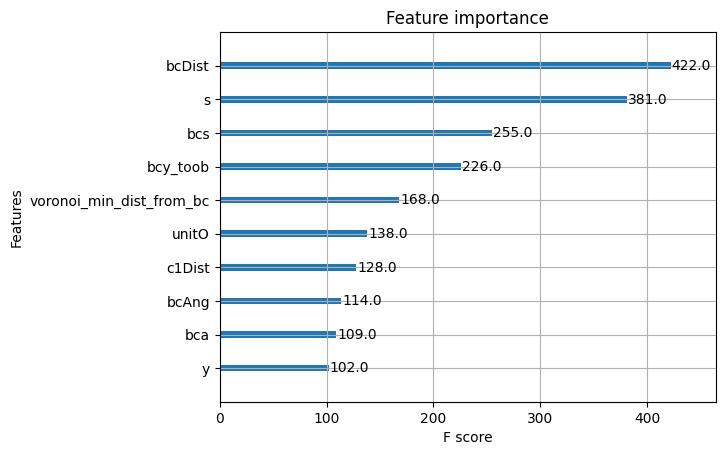

In [46]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, predictions)
area_under_pr_curve = auc(recall, precision)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC-PR = {area_under_pr_curve:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_val_tackle, binary_predictions_tackle) # Change to y_val and binary_predictions to view tackle and non tackles

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tackle', 'Tackle'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
xgb.plot_importance(model, max_num_features=10, importance_type='weight')

(array([266., 117., 116.,  83.,  77.,  64.,  71.,  48.,  20.,   8.]),
 array([0.50000292, 0.54283786, 0.5856728 , 0.62850773, 0.67134267,
        0.71417761, 0.75701255, 0.79984748, 0.84268242, 0.88551736,
        0.9283523 ]),
 <BarContainer object of 10 artists>)

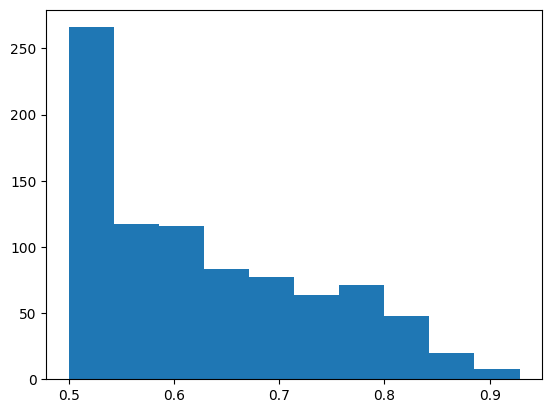

In [47]:
# Plot distribution of probabilities
plt.hist(predictions[predictions > .5])

# Repeat model with extending dv to frames before

In [198]:
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("val.csv")

# Sort dataframe and reset index to be able to evaluate model later
train_df = train_df.sort_values(by=['gameId','playId','nflId','frameId']).reset_index(drop=True)
val_df = val_df.sort_values(by=['gameId','playId','nflId','frameId']).reset_index(drop=True)

# Create eval df without extending dv to evaluate later
eval_df = val_df[val_df['tackle_binary_single'] == 1].copy()

In [199]:
# TODO: temporary until we fix dataset
train_df['tackle_efficiency_ingame'].fillna(0, inplace=True)
train_df['tackle_rating_ingame'].fillna(0, inplace=True)

val_df['tackle_efficiency_ingame'].fillna(0, inplace=True)
val_df['tackle_rating_ingame'].fillna(0, inplace=True)

train_df.isna().sum()

# TODO: additional metrics we can include 
# Relative speed to ball carrier
train_df['relative_speed'] = train_df['s'] - train_df['bcs']

# Relative direction to ball carrier
train_df['relative_direction'] = train_df['unitDir'] - train_df['bcdir']
train_df['relative_direction'] = train_df['relative_direction'].apply(lambda x: (x + 360) % 360 if x < 0 else x % 360)

# Relative angle to ball carrier
x_diff = train_df['x'] - train_df['bcx']
y_diff = train_df['y'] - train_df['bcy']
train_df['relative_angle'] = np.arctan2(y_diff, x_diff) * (180/np.pi) 

# Relative speed to ball carrier
val_df['relative_speed'] = val_df['s'] - val_df['bcs']

# Relative direction to ball carrier
val_df['relative_direction'] = val_df['unitDir'] - val_df['bcdir']
val_df['relative_direction'] = val_df['relative_direction'].apply(lambda x: (x + 360) % 360 if x < 0 else x % 360)

# Relative angle to ball carrier
x_diff = val_df['x'] - val_df['bcx']
y_diff = val_df['y'] - val_df['bcy']
val_df['relative_angle'] = np.arctan2(y_diff, x_diff) * (180/np.pi) 

In [200]:
train_df

,gameId,playId,nflId,frameId,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single,down,yardsToGo,defendersInTheBox,offenseFormation,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,surface,inside_outside,weight,position,gamePlayId,relative_speed,relative_direction,relative_angle
0,2.022091e+09,56.0,38577.0,6.0,41.89,24.593333,272.29,280.53,288.200000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,3.195387,10.116071,10.461855,10.882909,12.035414,12.635874,12.701657,13.169210,14.799963,23.582173,7.067538,75.239538,89.059902,122.727777,103.094000,104.570954,166.159966,86.642246,80.903275,77.812451,158.729540,16.542527,2.62,3.35,3.948566,69.85,17.743333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,-1.26,70.09,75.747473
1,2.022091e+09,56.0,38577.0,7.0,41.90,24.253333,270.63,284.78,201.300000,1,0.413347,40.31,18.133333,4.01,5.10,111.79,204.77,191,WR,442.772727,pass,3.345400,10.086788,10.544857,11.042939,12.115168,12.681270,13.130640,13.479217,14.691715,24.271022,6.323172,92.625832,88.527825,124.259788,103.395170,104.138610,86.605545,81.382886,168.335165,77.889692,159.046043,15.193693,1.83,3.52,3.714688,69.69,18.133333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,-0.49,65.86,75.436307
2,2.022091e+09,56.0,38577.0,8.0,41.90,23.893333,269.63,287.79,127.600000,1,0.413347,40.46,18.453333,3.44,5.20,107.29,206.99,191,WR,451.454545,pass,3.710647,10.041120,10.660042,11.179383,12.171984,12.659878,13.032337,14.349362,14.575630,24.981773,5.627362,107.291090,88.774051,126.661142,104.399649,104.579610,87.366523,82.445000,169.890156,78.674692,158.785796,14.456480,1.16,3.65,3.572053,69.54,18.453333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,0.21,62.64,75.173520
3,2.022091e+09,56.0,38577.0,9.0,41.89,23.533333,268.07,286.62,67.100000,1,0.413347,40.59,18.723333,2.83,5.17,108.46,208.55,191,WR,448.850000,pass,4.231324,9.970321,10.804300,11.301407,12.214418,12.620479,12.893196,14.452578,15.217244,25.700070,4.982580,119.524569,88.529736,128.452719,104.676981,104.427774,87.570604,82.863501,78.953104,172.015808,159.176371,13.194007,0.61,3.65,3.494055,69.41,18.723333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,0.82,59.52,74.875993
4,2.022091e+09,56.0,38577.0,10.0,41.88,23.173333,267.66,285.63,50.600000,1,0.413347,40.69,18.933333,2.19,5.28,104.58,207.99,191,WR,458.400000,pass,4.825443,9.904247,10.976930,11.406371,12.245130,12.583116,12.740361,14.326078,16.081570,26.415299,4.403828,127.808663,89.337881,131.405010,105.951988,105.443888,88.935053,84.420300,80.361361,173.035824,158.492032,13.337327,0.46,3.64,3.365673,69.31,18.933333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,0,0,0.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,1.45,59.67,74.322673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581849,2.022111e+09,3787.0,54606.0,36.0,33.68,30.690000,255.95,229.60,175.90

In [201]:
# Number of frames per play
max_frame_per_game_train = pd.DataFrame(train_df.groupby('gamePlayId')['frameId'].max())

bin_width = 10
max_frame_range = range(0, int(max_frame_per_game_train['frameId'].max()) + bin_width, bin_width)

max_frame_per_game_train['frame_bucket'] = pd.cut(max_frame_per_game_train['frameId'], bins=max_frame_range)

bucket_counts = max_frame_per_game_train['frame_bucket'].value_counts().sort_index()
print(bucket_counts)

frame_bucket
(0, 10]        391
(10, 20]      1350
(20, 30]      1333
(30, 40]      1391
(40, 50]      2059
(50, 60]      1352
(60, 70]       542
(70, 80]       206
(80, 90]        53
(90, 100]       34
(100, 110]       6
(110, 120]       8
(120, 130]       2
(130, 140]       0
(140, 150]       0
(150, 160]       1
Name: count, dtype: int64


In [202]:
frames_to_extend = 5
extend_dv = 'tackle_binary_single'

# Identify rows where tackle_binary_single is equal to 1
tackle_rows_train = train_df[train_df[extend_dv] == 1]

# Create a list to store the indices of rows to be updated
rows_to_update_train = []

# Get identifiers for each row with tackle_binary_single = 1 
for _, row in tackle_rows_train.iterrows():
    gamePlayId = row['gamePlayId']
    nflId = row['nflId']
    frameId = row['frameId']

    # Identify the rows to be updated based on gamePlayId, nflId, and frame
    rows_to_update_train.extend(
        train_df[
            (train_df['gamePlayId'] == gamePlayId) &
            (train_df['nflId'] == nflId) &
            (train_df['frameId'] > frameId - frames_to_extend) # & (train_df['frameId'] <= frameId + 2))
        ].index
    )
    
# Update the values in the identified rows
train_df.loc[rows_to_update_train, extend_dv] = 1

# Identify rows where tackle_binary_single is equal to 1
tackle_rows_val = val_df[val_df[extend_dv] == 1]

# Create a list to store the indices of rows to be updated
rows_to_update_val = []

# Get identifiers for each row with tackle_binary_single = 1 
for _, row in tackle_rows_val.iterrows():
    gamePlayId = row['gamePlayId']
    nflId = row['nflId']
    frameId = row['frameId']

    # Identify the rows to be updated based on gamePlayId, nflId, and frame
    rows_to_update_val.extend(
        val_df[
            (val_df['gamePlayId'] == gamePlayId) &
            (val_df['nflId'] == nflId) &
            (val_df['frameId'] > frameId - frames_to_extend) # & (val_df['frameId'] <= frameId + 2))
        ].index
    )
    
# Update the values in the identified rows
val_df.loc[rows_to_update_val, 'tackle_binary_single'] = 1

In [203]:
train_df[train_df['tackle_binary_single'] == 1]

,gameId,playId,nflId,frameId,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single,down,yardsToGo,defendersInTheBox,offenseFormation,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,surface,inside_outside,weight,position,gamePlayId,relative_speed,relative_direction,relative_angle
47,2.022091e+09,56.0,43294.0,14.0,41.65,18.883333,103.63,137.19,414.109091,1,0.413347,40.84,19.413333,0.62,3.23,95.10,165.89,191,WR,280.422727,pass,9.836427,10.164433,12.375496,12.939849,12.946200,13.668083,14.024397,14.288912,22.188812,31.831074,0.967988,42.305542,53.134401,58.828166,55.119494,39.818753,41.470702,64.811689,13.383366,20.489182,38.963333,43.172434,4.38,2.41,0.000000,69.16,19.413333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,1,1.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,208,CB,2022090800.056.0,1.79,297.74,-33.197566
48,2.022091e+09,56.0,43294.0,15.0,41.59,19.093333,110.19,141.48,392.363636,1,0.413347,40.81,19.463333,0.52,2.73,98.23,136.06,191,WR,237.013636,pass,9.880855,9.962655,12.045779,12.645711,12.703716,13.410809,13.895039,14.088666,22.388580,31.998141,0.863308,47.943983,49.585347,52.819177,33.882561,49.063920,35.444502,58.815454,5.556596,27.013462,46.715012,44.432256,4.15,2.00,0.000000,69.19,19.463333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,1,1.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,208,CB,2022090800.056.0,1.48,334.13,-25.377744
49,2.022091e+09,56.0,43294.0,16.0,41.51,19.253333,119.10,145.69,369.672727,1,0.413347,40.77,19.483333,0.50,2.20,99.96,108.66,191,WR,191.000000,pass,9.592752,10.095435,11.699855,12.337362,12.457869,13.160460,13.772509,13.896348,22.600657,32.209679,0.774919,40.141225,59.246135,44.261734,25.367721,40.413933,26.895986,50.357012,4.748177,35.935726,56.754980,43.634191,3.91,1.64,0.000000,69.23,19.483333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,1,1.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,208,CB,2022090800.056.0,1.14,10.44,-17.265809
50,2.022091e+09,56.0,43294.0,17.0,41.43,19.373333,130.08,148.42,335.636364,1,0.413347,40.73,19.493333,0.54,1.74,99.96,87.79,191,WR,151.063636,pass,9.321936,10.229902,11.339744,12.036362,12.209836,12.943979,13.646293,13.734810,22.822664,32.440661,0.710211,30.104931,70.957309,33.370782,14.592601,29.600123,16.070335,39.705282,17.155288,46.924767,68.762347,40.192421,3.55,1.35,0.000000,69.27,19.493333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,1,1.0,0.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,208,CB,2022090800.056.0,0.81,42.29,-9.727579
51,2.022091e+09,56.0,43294.0,18.0,41.34,19.463333,142.26,153.81,299.709091,1,0.413347,40.67,19.483333,0.62,1.31,100.54,78.02,191,WR,113.731818,pass,9.038429,10.340450,10.992088,11.728312,11.947619,12.722079,13.506017,13.591299,23.044672,32.675765,0.670298,18.623468,83.936472,21.250447,2.423803,17.363565,3.925024,27.719733,30.810862,59.113635,81.900486,36.030186,3.17,1.10,0.000000,69.33,19.483333,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,1,1.0,1.0,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,208,CB,2022090800.056.0,0.48,64.24,-1.709814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581719,2.022111e+09,3787.0,52578.0,36.0,23.73,20.070000,327.43,55.43,138.636364,0,0.992596,25.37,20

In [204]:
val_df[val_df['tackle_binary_single'] == 1]

,gameId,playId,nflId,frameId,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single,down,yardsToGo,defendersInTheBox,offenseFormation,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,surface,inside_outside,weight,position,gamePlayId,relative_speed,relative_direction,relative_angle
305,2.022091e+09,299.0,53459.0,45.0,30.97,30.400000,62.22,166.12,363.400000,0,0.730319,31.94,30.110000,1.71,4.52,147.26,44.83,200,RB,410.909091,run,0.796241,0.839345,1.361249,1.652453,3.014399,3.877693,4.756848,4.820633,12.061994,16.990918,1.012423,140.627825,77.415249,111.390437,46.417486,105.069057,158.701827,22.956342,113.973831,135.302366,165.045831,78.865038,3.16,2.80,0.628042,78.06,23.190000,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,1,1.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,253,DE,2022090800.0299.0,1.09,17.39,163.354962
306,2.022091e+09,299.0,53459.0,46.0,31.11,30.650000,62.42,166.86,409.400000,0,0.730319,32.04,30.210000,1.30,3.65,149.69,44.62,200,RB,331.818182,run,0.792465,0.923580,1.463489,1.694344,3.154489,4.119466,4.317893,4.840093,12.289711,17.226956,1.028834,142.244489,82.032094,112.965317,54.959434,108.704444,160.022095,21.063965,117.224865,134.751701,165.968557,87.739687,3.56,2.57,0.569089,77.96,23.090000,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,1,1.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,253,DE,2022090800.0299.0,1.27,17.80,154.680313
307,2.022091e+09,299.0,53459.0,47.0,31.22,30.860000,62.72,166.86,349.600000,0,0.730319,32.15,30.290000,0.98,2.88,147.95,45.03,200,RB,261.818182,run,0.745252,1.034650,1.540292,1.771384,3.273713,3.907493,4.313931,4.845462,12.478373,17.397830,1.090780,141.108514,83.081603,112.723920,60.455245,111.435289,19.336528,161.340809,120.000687,134.168892,166.732286,94.224267,3.04,2.24,0.560903,77.85,23.010000,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,1,1.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,253,DE,2022090800.0299.0,1.26,17.69,148.495733
308,2.022091e+09,299.0,53459.0,48.0,31.31,31.050000,63.00,167.61,302.450000,0,0.730319,32.21,30.350000,0.72,2.34,154.38,44.92,200,RB,212.727273,run,0.693758,1.154340,1.615240,1.860430,3.395585,3.554490,4.476036,4.840961,12.613334,17.523290,1.140175,137.962184,82.219773,111.513750,64.231977,113.496893,16.954670,162.271542,122.333730,133.502012,167.441428,100.874984,2.63,1.96,0.606162,77.79,22.950000,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,1,1.0,0.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,253,DE,2022090800.0299.0,1.24,18.08,142.125016
309,2.022091e+09,299.0,53459.0,49.0,31.37,31.250000,64.89,171.02,272.550000,0,0.730319,32.27,30.400000,0.52,1.87,287.22,46.29,200,RB,170.000000,run,0.674166,1.312440,1.697587,1.974285,3.199766,3.526656,4.633929,4.806922,12.745791,17.625791,1.237942,134.035542,82.634672,111.322096,68.665466,12.289860,116.915272,161.946335,123.122106,134.407613,166.536496,108.253423,2.37,1.71,0.778291,77.73,22.900000,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,1,1.0,1.0,1,10,6.0,SINGLEBACK,27,308,0,7,turf,inside,253,DE,2022090800.0299.0,1.19,18.60,136.636577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556801,2.022111e+09,3602.0,44871.0,38.0,44.38,25.803333,28.34,11.21

In [205]:
# Check data is being extended correctly
# train_df = train_df[train_df['gamePlayId'].isin(train_df.gamePlayId.sample(1))]
# display(train_df)
# display(train_df[train_df['nflId'].isin(train_df.loc[train_df['tackle_binary_single'] == 1, 'nflId'].unique())])
# train_df[train_df['tackle_binary_single'] == 1]

In [206]:
used_dv = ['tackle_binary_single']
all_dv = ['tackle_binary_all','tackle_nonbinary_all','tackle_nonbinary_single', 'tackle_binary_single']
# unused_dv = [value for value in all_dv if value not in used_dv]
cols_to_drop = ['gameId', 'playId', 'frameId', 'nflId'] + all_dv # Keeping gamePlayId in for now, as splitting data later using it. Will drop then

x_train = train_df.drop(columns = cols_to_drop)
x_val = val_df.drop(columns = cols_to_drop)

y_train = train_df[used_dv]
y_val = val_df[used_dv]

In [207]:
display(x_train)
display(y_train)
y_train.value_counts()

,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,down,yardsToGo,defendersInTheBox,offenseFormation,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,surface,inside_outside,weight,position,gamePlayId,relative_speed,relative_direction,relative_angle
0,41.89,24.593333,272.29,280.53,288.200000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,3.195387,10.116071,10.461855,10.882909,12.035414,12.635874,12.701657,13.169210,14.799963,23.582173,7.067538,75.239538,89.059902,122.727777,103.094000,104.570954,166.159966,86.642246,80.903275,77.812451,158.729540,16.542527,2.62,3.35,3.948566,69.85,17.743333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,-1.26,70.09,75.747473
1,41.90,24.253333,270.63,284.78,201.300000,1,0.413347,40.31,18.133333,4.01,5.10,111.79,204.77,191,WR,442.772727,pass,3.345400,10.086788,10.544857,11.042939,12.115168,12.681270,13.130640,13.479217,14.691715,24.271022,6.323172,92.625832,88.527825,124.259788,103.395170,104.138610,86.605545,81.382886,168.335165,77.889692,159.046043,15.193693,1.83,3.52,3.714688,69.69,18.133333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,-0.49,65.86,75.436307
2,41.90,23.893333,269.63,287.79,127.600000,1,0.413347,40.46,18.453333,3.44,5.20,107.29,206.99,191,WR,451.454545,pass,3.710647,10.041120,10.660042,11.179383,12.171984,12.659878,13.032337,14.349362,14.575630,24.981773,5.627362,107.291090,88.774051,126.661142,104.399649,104.579610,87.366523,82.445000,169.890156,78.674692,158.785796,14.456480,1.16,3.65,3.572053,69.54,18.453333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,0.21,62.64,75.173520
3,41.89,23.533333,268.07,286.62,67.100000,1,0.413347,40.59,18.723333,2.83,5.17,108.46,208.55,191,WR,448.850000,pass,4.231324,9.970321,10.804300,11.301407,12.214418,12.620479,12.893196,14.452578,15.217244,25.700070,4.982580,119.524569,88.529736,128.452719,104.676981,104.427774,87.570604,82.863501,78.953104,172.015808,159.176371,13.194007,0.61,3.65,3.494055,69.41,18.723333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,0.82,59.52,74.875993
4,41.88,23.173333,267.66,285.63,50.600000,1,0.413347,40.69,18.933333,2.19,5.28,104.58,207.99,191,WR,458.400000,pass,4.825443,9.904247,10.976930,11.406371,12.245130,12.583116,12.740361,14.326078,16.081570,26.415299,4.403828,127.808663,89.337881,131.405010,105.951988,105.443888,88.935053,84.420300,80.361361,173.035824,158.492032,13.337327,0.46,3.64,3.365673,69.31,18.933333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,SHOTGUN,85,0,0,0,turf,inside,242,ILB,2022090800.056.0,1.45,59.67,74.322673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581849,33.68,30.690000,255.95,229.60,175.909091,0,0.992596,25.37,20.230000,3.44,3.14,103.70,120.04,223,RB,318.281818,run,3.470922,9.904307,12.024650,12.174810,13.038443,14.315320,14.328245,17.779362,18.653077,21.412893,13.359180,74.629294,137.159482,18.728170,34.746366,33.561028,35.539720,52.551883,25.999013,53.344312,0.766580,24.415563,2.15,2.99,10.126569,84.63,20.230000,0,1,0,0,1.0,0.5,5.0,5.0,0.0,2.0,2,4,5,1,1,3,1,5,1,10,4.0

,tackle_binary_single
0,0
1,0
2,0
3,0
4,0
...,...
2581849,0
2581850,0
2581851,0
2581852,0


tackle_binary_single
0                       2528576
1                         53278
Name: count, dtype: int64

In [208]:
object_cols = x_train.select_dtypes(include='object').dtypes.index
object_cols

x_train[object_cols] = x_train[object_cols].astype('category')
x_val[object_cols] = x_val[object_cols].astype('category')

print(x_train.select_dtypes(include='object').dtypes)

x_train
x_train.dtypes.unique()

Series([], dtype: object)


array([dtype('float64'), dtype('int64'),
       CategoricalDtype(categories=['FB', 'QB', 'RB', 'TE', 'WR'], ordered=False),
       CategoricalDtype(categories=['other', 'pass', 'qb_run', 'run'], ordered=False),
       CategoricalDtype(categories=['EMPTY', 'I_FORM', 'JUMBO', 'PISTOL', 'SHOTGUN',
                         'SINGLEBACK', 'WILDCAT'],
       , ordered=False)                                                             ,
       CategoricalDtype(categories=['grass', 'turf'], ordered=False),
       CategoricalDtype(categories=['inside', 'outside'], ordered=False),
       CategoricalDtype(categories=['CB', 'DB', 'DE', 'DT', 'FB', 'FS', 'ILB', 'MLB', 'NT',
                         'OLB', 'RB', 'SS', 'WR'],
       , ordered=False)                                                                    ,
       CategoricalDtype(categories=['2022090800.0101.0', '2022090800.01030.0',
                         '2022090800.01187.0', '2022090800.0122.0',
                         '2022090800.012

In [209]:
x_train = x_train.drop(columns=['bcPosition','play_type','offenseFormation','surface','inside_outside','position','gamePlayId'])
x_val = x_val.drop(columns=['bcPosition','play_type','offenseFormation','surface','inside_outside','position','gamePlayId'])

In [210]:
display(x_train)
display(x_val)

,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcForce,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,down,yardsToGo,defendersInTheBox,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,weight,relative_speed,relative_direction,relative_angle
0,41.89,24.593333,272.29,280.53,288.200000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,418.463636,3.195387,10.116071,10.461855,10.882909,12.035414,12.635874,12.701657,13.169210,14.799963,23.582173,7.067538,75.239538,89.059902,122.727777,103.094000,104.570954,166.159966,86.642246,80.903275,77.812451,158.729540,16.542527,2.62,3.35,3.948566,69.85,17.743333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,-1.26,70.09,75.747473
1,41.90,24.253333,270.63,284.78,201.300000,1,0.413347,40.31,18.133333,4.01,5.10,111.79,204.77,191,442.772727,3.345400,10.086788,10.544857,11.042939,12.115168,12.681270,13.130640,13.479217,14.691715,24.271022,6.323172,92.625832,88.527825,124.259788,103.395170,104.138610,86.605545,81.382886,168.335165,77.889692,159.046043,15.193693,1.83,3.52,3.714688,69.69,18.133333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,-0.49,65.86,75.436307
2,41.90,23.893333,269.63,287.79,127.600000,1,0.413347,40.46,18.453333,3.44,5.20,107.29,206.99,191,451.454545,3.710647,10.041120,10.660042,11.179383,12.171984,12.659878,13.032337,14.349362,14.575630,24.981773,5.627362,107.291090,88.774051,126.661142,104.399649,104.579610,87.366523,82.445000,169.890156,78.674692,158.785796,14.456480,1.16,3.65,3.572053,69.54,18.453333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,0.21,62.64,75.173520
3,41.89,23.533333,268.07,286.62,67.100000,1,0.413347,40.59,18.723333,2.83,5.17,108.46,208.55,191,448.850000,4.231324,9.970321,10.804300,11.301407,12.214418,12.620479,12.893196,14.452578,15.217244,25.700070,4.982580,119.524569,88.529736,128.452719,104.676981,104.427774,87.570604,82.863501,78.953104,172.015808,159.176371,13.194007,0.61,3.65,3.494055,69.41,18.723333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,0.82,59.52,74.875993
4,41.88,23.173333,267.66,285.63,50.600000,1,0.413347,40.69,18.933333,2.19,5.28,104.58,207.99,191,458.400000,4.825443,9.904247,10.976930,11.406371,12.245130,12.583116,12.740361,14.326078,16.081570,26.415299,4.403828,127.808663,89.337881,131.405010,105.951988,105.443888,88.935053,84.420300,80.361361,173.035824,158.492032,13.337327,0.46,3.64,3.365673,69.31,18.933333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,1.45,59.67,74.322673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581849,33.68,30.690000,255.95,229.60,175.909091,0,0.992596,25.37,20.230000,3.44,3.14,103.70,120.04,223,318.281818,3.470922,9.904307,12.024650,12.174810,13.038443,14.315320,14.328245,17.779362,18.653077,21.412893,13.359180,74.629294,137.159482,18.728170,34.746366,33.561028,35.539720,52.551883,25.999013,53.344312,0.766580,24.415563,2.15,2.99,10.126569,84.63,20.230000,0,1,0,0,1.0,0.5,5.0,5.0,0.0,2.0,2,4,5,1,1,3,1,5,1,10,4.0,21,3577,13,27,180,-0.45,135.91,51.534437
2581850,33.61,30.410000,255.82,232.74,189.000000,0,0.992596,25.65,20.070000,3.09,3.23,103.70,120.75,223,327.404545,3.151587,9.588326,11.585871,11.895516,12.781064,13.977024,14.236239,17.647374,18.421086,21.099318,13.049031,74.001697,139.041160,18.056033,34.398459,33.166355,35.521055,53.398272,25.762751,53.822215,1.197

,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcForce,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,down,yardsToGo,defendersInTheBox,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,weight,relative_speed,relative_direction,relative_angle
0,25.50,28.980000,144.94,214.39,167.045455,0,0.730319,21.58,25.770000,4.98,2.57,73.45,47.65,200,233.636364,0.490918,2.469818,2.681679,3.123492,3.197890,5.313266,5.321325,5.432826,5.593255,6.915671,5.066606,128.563532,156.819480,143.089561,29.732712,105.321811,86.939113,68.636756,135.666698,139.767065,127.380412,74.373277,1.47,2.84,3.687020,88.42,25.770000,0,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,10,6.0,27,308,0,7,250,-2.14,97.29,39.313277
1,25.27,29.150000,141.46,217.00,167.045455,0,0.730319,21.97,26.090000,5.15,2.12,71.77,50.99,200,192.727273,0.451885,2.654242,2.663269,2.932047,3.793178,4.961905,5.430893,5.520743,5.682614,6.723362,4.500400,153.403697,168.649598,152.699081,21.279234,116.519091,70.515720,143.369480,89.863984,147.006833,133.317796,81.378921,1.47,2.86,2.400320,88.03,26.090000,0,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,10,6.0,27,308,0,7,250,-2.29,90.47,42.838921
2,25.05,29.330000,139.24,218.90,144.318182,0,0.730319,22.38,26.400000,5.25,1.98,72.85,53.83,200,180.000000,0.459674,2.674191,2.849088,2.878976,4.464807,4.647591,5.474386,5.751539,5.787884,6.563970,3.964064,174.878596,160.584606,10.865457,177.308158,124.717409,74.592040,149.956200,153.356876,91.790989,138.112379,88.418252,1.27,2.84,1.071008,87.62,26.400000,0,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,10,6.0,27,308,0,7,250,-2.41,85.41,47.658252
3,24.85,29.510000,136.64,225.20,152.272727,0,0.730319,22.82,26.690000,5.24,2.34,75.27,57.90,200,212.727273,0.488774,2.707563,2.873082,3.118878,4.411712,5.161395,5.545097,5.840616,6.076981,6.416736,3.474665,167.402720,168.282676,0.616794,174.869452,78.672916,132.027780,156.734968,160.012793,94.170099,143.321427,97.611465,1.34,2.71,0.438721,87.18,26.610000,0,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,10,6.0,27,308,0,7,250,-2.53,78.74,54.251465
4,24.67,29.670000,135.21,257.99,172.727273,0,0.730319,23.29,26.940000,5.28,2.94,79.36,62.98,200,267.272727,0.512445,2.741277,3.021341,3.353163,4.269801,5.626402,5.874504,5.925546,6.290986,6.403444,3.058970,152.230526,174.461765,10.047087,168.900068,83.744068,162.083734,137.033832,165.206520,147.368201,95.557253,107.973653,1.52,2.50,0.000000,86.71,26.360000,0,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,3,3,5,1,1,3,1,5,1,10,6.0,27,308,0,7,250,-2.78,72.23,63.183653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556969,49.61,27.563333,267.34,235.63,282.750000,1,0.004137,44.68,26.003333,1.35,2.91,187.86,160.15,211,279.095455,2.057596,3.410059,3.726620,3.752892,5.006366,5.777551,7.229281,8.310054,9.715930,10.008042,5.170928,164.992412,101.253991,125.255437,45.364135,54.157804,105.492706,46.996599,50.263259,116.068120,14.362901,69.781065,3.19,3.51,3.136947,65.32,26.003333,3,2,0,1,0.833333,0.666667,7.0,0.0,0.0,5.0,4,3,4,1,1,1,3,5,1,10,8.0,75,3397,13,27,195,2.16,107.19,17.558935
556970,49.58,27.233333,262.25,232.27,312.886364,1,0.004137,44.63,26.133333,1.49,1.92,179.67,156.32,211,184.145455,2.220090,3.314121,3.586321,3.657718,4.886154,5.628801,7.112482,8.170006,9.777326,9.886905,5.070749,171.733836,100.356923,42.567162,125.366678,51.748783,103.389825,42.269087,45.309973

In [211]:
# x_train.drop(columns='position', inplace=True)

from imblearn.over_sampling import SMOTE


# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# After applying SMOTE, you need to re-calculate the group sizes if you're using group information in XGBoost
# group_sizes_train_smote = [len(group) for _, group in x_train_smote.groupby('gamePlayId')]
# group_sizes_train_smote = x_train.groupby('gamePlayId').size().tolist()

# Drop the 'gamePlayId' column as before
# x_train_smote = x_train_smote.drop(columns='gamePlayId')

dtrain = xgb.DMatrix(x_train_smote, label=y_train_smote, enable_categorical=True)#, group=group_sizes_train_smote)
# dval remains the same as you don't apply SMOTE to validation or test data

# group_sizes_train = x_train.groupby('gamePlayId').size().tolist()
# group_sizes_val = x_val.groupby('gamePlayId').size().tolist()

# x_train = x_train.drop(columns = 'gamePlayId')
# x_val = x_val.drop(columns = 'gamePlayId')

# Convert data into DMatrix format (XGBoost's internal data structure)
# dtrain = xgb.DMatrix(x_train, label=y_train, enable_categorical=True, group=group_sizes_train)
dval = xgb.DMatrix(x_val, label=y_val, enable_categorical=True)#, group=group_sizes_val)
# dtest = xgb.DMatrix(x_test, label=y_test, enable_categorical=True)


In [225]:
# Set hyperparameters for XGBoost model
# params = {
    # 'objective': 'binary:logistic',  # for binary classification
    # 'eval_metric': 'logloss',  # use logloss for binary classification problems todo: test between logloss, error, auc
    # 'max_depth': 4,  # maximum depth of the tree
    # 'eta': 0.05,  # learning rate
    # 'subsample': 0.9,  # fraction of samples used for fitting the trees
    # 'colsample_bytree': 0.9,  # fraction of features used for fitting the trees
    # 'n_estimators': 140,
    # 'gamma': 0.2,
    # 'min_child_weight': 5,
    # 'scale_pos_weight': 5
# }

params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',  # use logloss for binary classification problems todo: test between logloss, error, auc
    'colsample_bytree': 0.8, 
    'gamma': 0.4, 
    'learning_rate': 0.1,
    'max_depth': 6, 
    'min_child_weight': 10, 
    'n_estimators': 180, 
    'reg_alpha': 1, 
    'reg_lambda': 0, 
    'scale_pos_weight': 4, 
    'subsample': 0.8
}

# Train the XGBoost model with early stopping
num_rounds = 250  # number of boosting rounds
early_stopping_rounds = 10  # You can adjust this value

# Specify the validation set for early stopping
evals = [(dtrain, 'train'), (dval, 'validation')]

# Add early stopping rounds
model = xgb.train(params, dtrain, num_rounds, evals=evals, early_stopping_rounds=early_stopping_rounds)
# model = xgb.train(params, dtrain, num_rounds)


[0]	train-logloss:0.73124	validation-logloss:1.20323
[1]	train-logloss:0.64822	validation-logloss:1.05999
[2]	train-logloss:0.58001	validation-logloss:0.94467
[3]	train-logloss:0.53161	validation-logloss:0.86515
[4]	train-logloss:0.48680	validation-logloss:0.79190
[5]	train-logloss:0.46809	validation-logloss:0.76356
[6]	train-logloss:0.43431	validation-logloss:0.70934
[7]	train-logloss:0.40544	validation-logloss:0.66376
[8]	train-logloss:0.38113	validation-logloss:0.62573
[9]	train-logloss:0.36014	validation-logloss:0.59335
[10]	train-logloss:0.35167	validation-logloss:0.58129
[11]	train-logloss:0.33471	validation-logloss:0.55538
[12]	train-logloss:0.32022	validation-logloss:0.53374
[13]	train-logloss:0.30746	validation-logloss:0.51470
[14]	train-logloss:0.29619	validation-logloss:0.49792
[15]	train-logloss:0.28757	validation-logloss:0.48568
[16]	train-logloss:0.27858	validation-logloss:0.47255
[17]	train-logloss:0.27201	validation-logloss:0.46351
[18]	train-logloss:0.26617	validation-

In [226]:
# Evaluate the model
predictions = model.predict(dval)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]

# Only consider instances where true label is 1 (completed tackle)
y_val_tackle = y_val.loc[y_val['tackle_binary_single'] == 1]
binary_predictions_tackle = [pred for i, pred in enumerate(binary_predictions) if y_val['tackle_binary_single'].iloc[i] == 1]

# Evaluate metrics
accuracy = accuracy_score(y_val, binary_predictions)
precision = precision_score(y_val, binary_predictions)
recall = recall_score(y_val, binary_predictions)
f1 = f1_score(y_val, binary_predictions)
roc_auc = roc_auc_score(y_val, binary_predictions)

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}\n')

print(classification_report(y_val, binary_predictions))

Accuracy: 0.9047, Precision: 0.1746, Recall: 0.9524, F1-Score: 0.2951, ROC AUC: 0.9280
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    545305
           1       0.17      0.95      0.30     11669

    accuracy                           0.90    556974
   macro avg       0.59      0.93      0.62    556974
weighted avg       0.98      0.90      0.94    556974


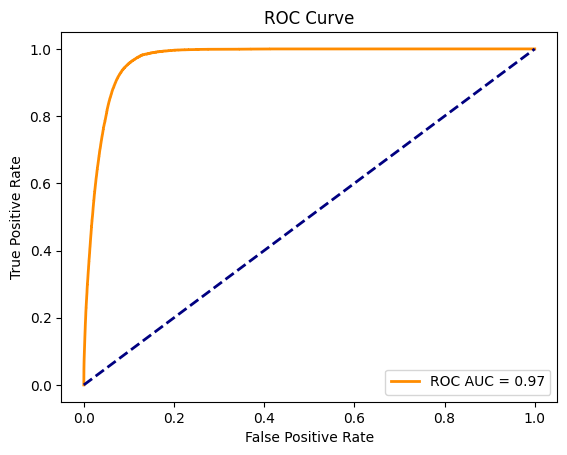

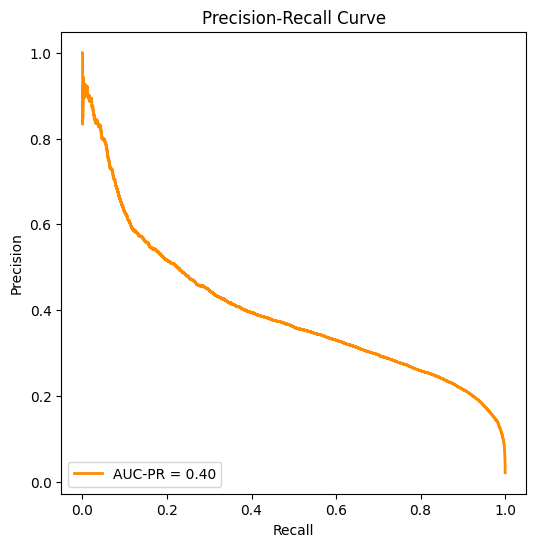

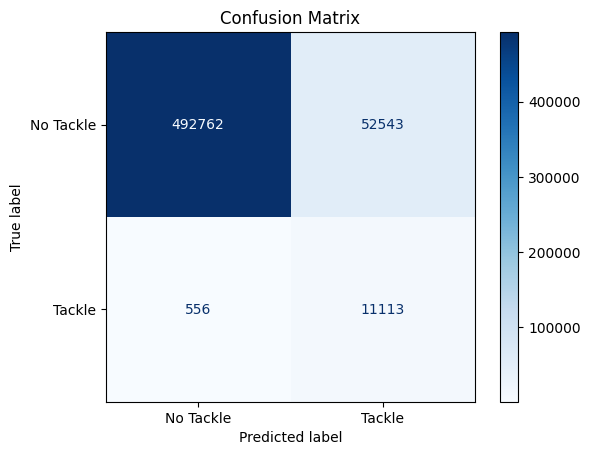

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

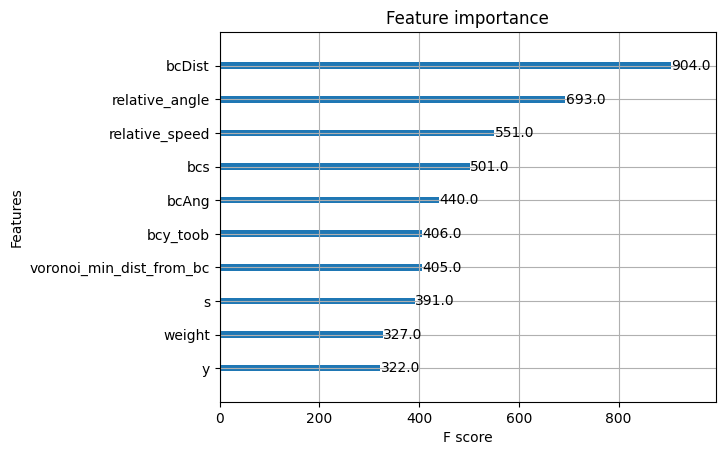

In [227]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, predictions)
area_under_pr_curve = auc(recall, precision)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC-PR = {area_under_pr_curve:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_val, binary_predictions) # Change to y_val and binary_predictions to view tackle and non tackles or y_val_tackle, binary_predictions_tackle

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tackle', 'Tackle'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
xgb.plot_importance(model, max_num_features=10, importance_type='weight')

(array([ 2603.,  2741.,  3024.,  3080.,  3439.,  4083.,  4998.,  6867.,
        11527., 21294.]),
 array([0.50000095, 0.54995275, 0.59990448, 0.64985627, 0.699808  ,
        0.74975979, 0.79971159, 0.84966332, 0.89961511, 0.94956684,
        0.99951863]),
 <BarContainer object of 10 artists>)

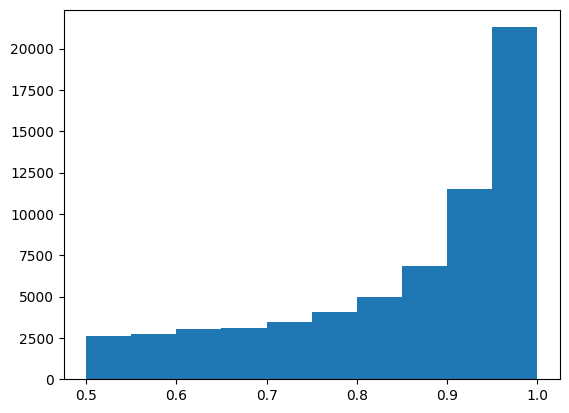

In [228]:
# Plot distribution of probabilities
plt.hist(predictions[predictions > .5])

In [229]:
# Make binary predictions into a dataframe
binary_predictions_eval = pd.DataFrame(binary_predictions).rename(columns={0 : 'prediction'})

# Merge true labels output to predictions dataframe
binary_predictions_eval = binary_predictions_eval.merge(y_val, left_index = True, right_index = True, how = 'inner')

binary_predictions_eval

,prediction,tackle_binary_single
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
556969,0,0
556970,0,0
556971,0,0
556972,0,0


In [230]:
# Evaluate times it predicted tackle in any of the frames where tackle was extended
num_correct_tackle = 0

# Loop over eval_df 
for idx, row in eval_df.iterrows():
    # If tackle = 1, see if predicted a tackle on any of frames we extended tackle to for training
    if row['tackle_binary_single'] == 1:
        # Check if any of the previous 'frames_to_compare' frames have a prediction of 1
        if any(binary_predictions_eval.loc[idx - i, 'prediction'] == 1 for i in range(0, frames_to_extend)):
            num_correct_tackle += 1

In [231]:
num_true_tackle = eval_df.tackle_binary_single.sum()

perc_true_tackle = num_correct_tackle / num_true_tackle
perc_missed_tackle = 1 - perc_true_tackle

print("Percentage of true tackles : ", perc_true_tackle, '\nPercentage of missed tackles: ', perc_missed_tackle)

Percentage of true tackles :  0.9821428571428571 
Percentage of missed tackles:  0.017857142857142905


In [232]:
# Merge probabilities back to original 
val_df_final = val_df.merge(pd.DataFrame(predictions), left_index=True, right_index=True, how='inner').rename(columns={0 : 'prediction'})
val_df_final = val_df_final[['gameId','playId','nflId','frameId','tackle_binary_single','prediction']]

val_df_final[val_df_final['tackle_binary_single'] == 1]

,gameId,playId,nflId,frameId,tackle_binary_single,prediction
305,2.022091e+09,299.0,53459.0,45.0,1,0.916674
306,2.022091e+09,299.0,53459.0,46.0,1,0.891468
307,2.022091e+09,299.0,53459.0,47.0,1,0.889704
308,2.022091e+09,299.0,53459.0,48.0,1,0.928093
309,2.022091e+09,299.0,53459.0,49.0,1,0.934195
...,...,...,...,...,...,...
556801,2.022111e+09,3602.0,44871.0,38.0,1,0.948000
556802,2.022111e+09,3602.0,44871.0,39.0,1,0.957047
556803,2.022111e+09,3602.0,44871.0,40.0,1,0.955885
556804,2.022111e+09,3602.0,44871.0,41.0,1,0.948300


(array([ 114.,   84.,  106.,  126.,  127.,  159.,  260.,  475., 1284.,
        8934.]),
 array([0.00317291, 0.10280748, 0.20244205, 0.30207664, 0.4017112 ,
        0.50134575, 0.60098034, 0.70061493, 0.80024952, 0.89988405,
        0.99951863]),
 <BarContainer object of 10 artists>)

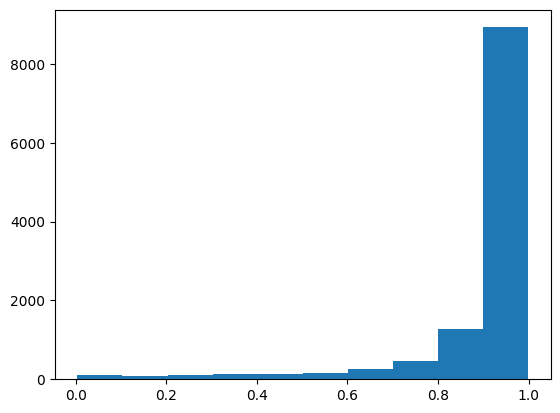

In [240]:
probs_for_tackles = val_df_final[val_df_final['tackle_binary_single'] == 1]
plt.hist(probs_for_tackles.prediction, bins = 10)

(array([457894.,  14716.,   8260.,   6333.,   5535.,   5180.,   5851.,
          7032.,  10576.,  23928.]),
 array([3.76173574e-07, 9.99189988e-02, 1.99837610e-01, 2.99756229e-01,
        3.99674863e-01, 4.99593467e-01, 5.99512100e-01, 6.99430704e-01,
        7.99349308e-01, 8.99267972e-01, 9.99186575e-01]),
 <BarContainer object of 10 artists>)

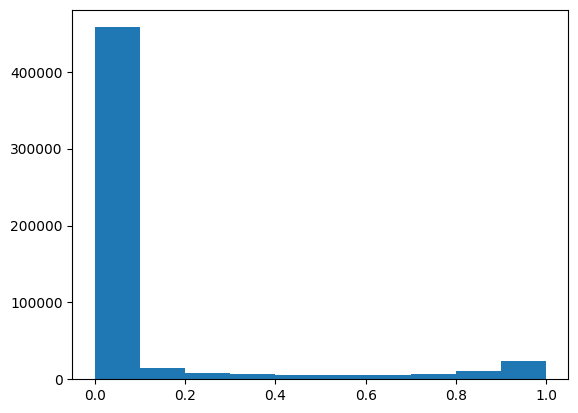

In [241]:
probs_no_tackles = val_df_final[val_df_final['tackle_binary_single'] == 0]
plt.hist(probs_no_tackles.prediction, bins = 10)

(array([ 2603.,  2741.,  3024.,  3080.,  3439.,  4083.,  4998.,  6867.,
        11527., 21294.]),
 array([0.50000095, 0.54995275, 0.59990448, 0.64985627, 0.699808  ,
        0.74975979, 0.79971159, 0.84966332, 0.89961511, 0.94956684,
        0.99951863]),
 <BarContainer object of 10 artists>)

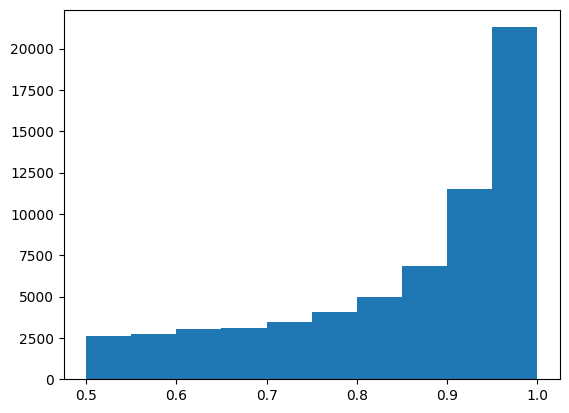

In [242]:
probs_over_50 = val_df_final[val_df_final['prediction'] >= 0.5]
plt.hist(probs_over_50.prediction, bins = 10)

(array([440788.,  17233.,   8866.,   5931.,   4613.,   3752.,   3356.,
          3103.,   2823.,   2853.]),
 array([3.76173574e-07, 4.99999151e-02, 9.99994576e-02, 1.49998993e-01,
        1.99998528e-01, 2.49998078e-01, 2.99997598e-01, 3.49997163e-01,
        3.99996698e-01, 4.49996233e-01, 4.99995768e-01]),
 <BarContainer object of 10 artists>)

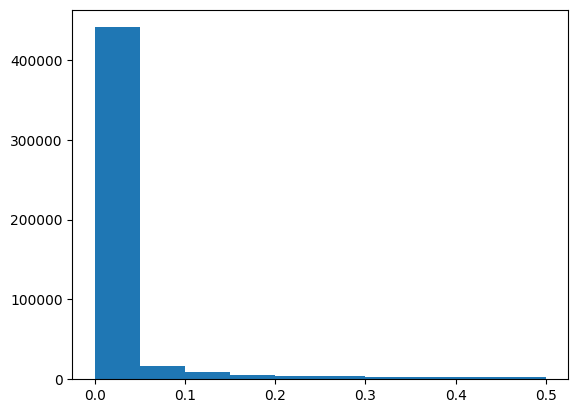

In [243]:
probs_under_50 = val_df_final[val_df_final['prediction'] < 0.5]
plt.hist(probs_under_50.prediction, bins = 10)

In [239]:
# Export results
val_df_final.to_csv('SMOTE_df.csv', index=False)

In [88]:
# Prepare dataset for grid search
object_cols = x_train.select_dtypes(include='category').dtypes.index
x_train.drop(columns = object_cols, inplace=True)
x_val.drop(columns = object_cols, inplace=True)
x_train

,nflId,x,y,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcForce,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,voronoi_min_dist_from_bc,bcx_adj,bcy_toob,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame,rolling_tackles,rolling_assists,rolling_ff,rolling_mt,DL,LB,DB,QB,RB,WR,TE,OL,down,yardsToGo,defendersInTheBox,absoluteYardlineNumber,timeSinceStart,preSnapHomeScore,preSnapVisitorScore,weight,relative_speed,relative_direction,relative_angle
0,38577.0,41.89,24.593333,272.29,280.53,288.200000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,418.463636,3.195387,10.116071,10.461855,10.882909,12.035414,12.635874,12.701657,13.169210,14.799963,23.582173,7.067538,75.239538,89.059902,122.727777,103.094000,104.570954,166.159966,86.642246,80.903275,77.812451,158.729540,16.542527,2.62,3.35,3.948566,69.85,17.743333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,-1.26,70.09,75.747473
1,38577.0,41.90,24.253333,270.63,284.78,201.300000,1,0.413347,40.31,18.133333,4.01,5.10,111.79,204.77,191,442.772727,3.345400,10.086788,10.544857,11.042939,12.115168,12.681270,13.130640,13.479217,14.691715,24.271022,6.323172,92.625832,88.527825,124.259788,103.395170,104.138610,86.605545,81.382886,168.335165,77.889692,159.046043,15.193693,1.83,3.52,3.714688,69.69,18.133333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,-0.49,65.86,75.436307
2,38577.0,41.90,23.893333,269.63,287.79,127.600000,1,0.413347,40.46,18.453333,3.44,5.20,107.29,206.99,191,451.454545,3.710647,10.041120,10.660042,11.179383,12.171984,12.659878,13.032337,14.349362,14.575630,24.981773,5.627362,107.291090,88.774051,126.661142,104.399649,104.579610,87.366523,82.445000,169.890156,78.674692,158.785796,14.456480,1.16,3.65,3.572053,69.54,18.453333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,0.21,62.64,75.173520
3,38577.0,41.89,23.533333,268.07,286.62,67.100000,1,0.413347,40.59,18.723333,2.83,5.17,108.46,208.55,191,448.850000,4.231324,9.970321,10.804300,11.301407,12.214418,12.620479,12.893196,14.452578,15.217244,25.700070,4.982580,119.524569,88.529736,128.452719,104.676981,104.427774,87.570604,82.863501,78.953104,172.015808,159.176371,13.194007,0.61,3.65,3.494055,69.41,18.723333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,0.82,59.52,74.875993
4,38577.0,41.88,23.173333,267.66,285.63,50.600000,1,0.413347,40.69,18.933333,2.19,5.28,104.58,207.99,191,458.400000,4.825443,9.904247,10.976930,11.406371,12.245130,12.583116,12.740361,14.326078,16.081570,26.415299,4.403828,127.808663,89.337881,131.405010,105.951988,105.443888,88.935053,84.420300,80.361361,173.035824,158.492032,13.337327,0.46,3.64,3.365673,69.31,18.933333,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,6,1,1,3,1,5,1,10,6.0,85,0,0,0,242,1.45,59.67,74.322673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581849,54606.0,33.68,30.690000,255.95,229.60,175.909091,0,0.992596,25.37,20.230000,3.44,3.14,103.70,120.04,223,318.281818,3.470922,9.904307,12.024650,12.174810,13.038443,14.315320,14.328245,17.779362,18.653077,21.412893,13.359180,74.629294,137.159482,18.728170,34.746366,33.561028,35.539720,52.551883,25.999013,53.344312,0.766580,24.415563,2.15,2.99,10.126569,84.63,20.230000,0,1,0,0,1.0,0.5,5.0,5.0,0.0,2.0,2,4,5,1,1,3,1,5,1,10,4.0,21,3577,13,27,180,-0.45,135.91,51.534437
2581850,54606.0,33.61,30.410000,255.82,232.74,189.000000,0,0.992596,25.65,20.070000,3.09,3.23,103.70,120.75,223,327.404545,3.151587,9.588326,11.585871,11.895516,12.781064,13.977024,14.236239,17.647374,18.421086,21.099318,13.049031,74.001697,139.041160,18.056033

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Assuming you have X_train and y_train
parameters = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 20),
    'subsample': [0.8, 0.9, 1.0], 
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'objective': ['binary:logistic']
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=parameters,
    scoring='recall', # f1 or recall
    n_iter=50,  # Number of random combinations to try #TODO: run with 100 overnight
    n_jobs=10,
    cv=10,
    verbose=True,
    random_state=42
)

# Include early stopping
random_search.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],
    eval_metric='logloss', 
    early_stopping_rounds=10,
    verbose=False
)

# Access the best estimator
xgb_best = random_search.best_estimator_

print(xgb_best)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/Users/gmduncan/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gmduncan/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/gmduncan/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gmduncan/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `ear

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [92]:
print(xgb_best.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.4, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 180, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': 1, 'reg_lambda': 0, 'sampling_method': None, 'scale_pos_weight': 4, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming you have X_train and y_train
parameters = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 20),
    'subsample': [0.8, 0.9, 1.0], 
    'colsample_bytree': [0.8, 0.9, 1.0],  
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=parameters,
    scoring='f1',
    n_jobs=10,
    cv=10,
    verbose=True
)

grid_search.fit(x_train, y_train)

# Access the best estimator
xgb_best = grid_search.best_estimator_

print(xgb_best)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


In [ ]:
print(xgb_best.get_params())
